# Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob,random
from sklearn.metrics import accuracy_score
import sklearn

In [5]:
link="http://bit.ly/w-data"
data=pd.read_csv(link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot a graph of the data

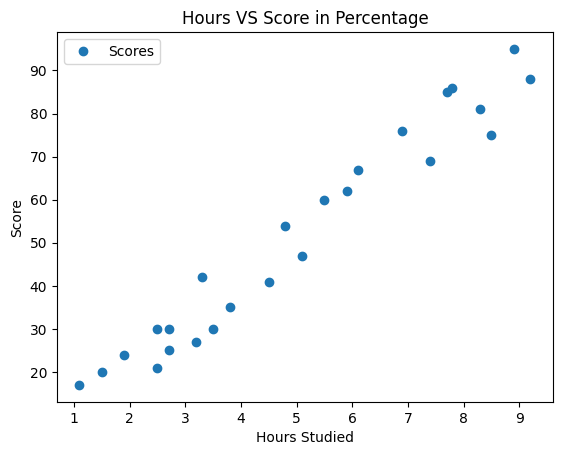

In [15]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours VS Score in Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

# Splitting the training and testing data

In [106]:
#from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values

y=data.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)

In [126]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Fitting the model

In [107]:
from sklearn.linear_model import LinearRegression
linearregressor=LinearRegression()
linearregressor.fit(x_train,y_train)
y_predict=linearregressor.predict(x_train)

In [112]:
y_predict

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [108]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


# Plot the line according to the equation y=mx+c

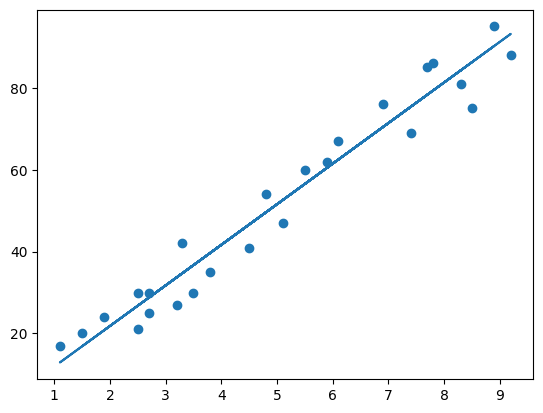

In [109]:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Evaluating the Training and Testing metrics

In [103]:
print('Training Score')
print(regressor.score(x_train,y_train))
print('Testing Score')
print(regressor.score(x_test,y_test))


Training Score
0.9515510725211552
Testing Score
0.9454906892105355


In [122]:
y_predict1=y_predict[:5]
y_predict1

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [124]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_predict1})
data

,Actual,Predicted
0,20,39.678655
1,27,20.848407
2,69,79.321281
3,30,70.401690
4,62,12.919882


In [119]:
#Let's predict the score for 9.25 hours
print('Scores of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Scores of student who studied for 9.25 hours a day [93.69173249]


In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squ_error=mean_squared_error(y_test,y_predict1)
mean_abs_error=mean_absolute_error(y_test,y_predict1)
print("Mean Square Error: ",mean_squ_error)
print("Mean Absolute Error: ",mean_abs_error)

Mean Square Error:  914.5549752244239
Mean Absolute Error:  25.126667098277863
